In [3]:
#By Jacob Haywood 
#Student ID: 801182240
#ChatGPT was used during the learning process to help with coding and debuging.
#Significant code was taken from Lecture 12-Gradient_Descent_BackPropogation as this is the lecture the assignment referenced

In [4]:
import torch
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
def model(t_u, w, b):
    return w * t_u + b

In [6]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [8]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [9]:
t_un = (t_u - t_u.mean()) / t_u.std()

In [10]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [11]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [12]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

In [13]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad
    
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [14]:
training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.927646
Epoch 1000, Loss 2.927645
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927645
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927645
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927645
Epoch 4500, Loss 2.927645
Epoch 5000, Loss 2.927645


tensor([ 9.0349, 10.5000], requires_grad=True)

In [15]:
def model_nonlinear(t_u, w1, w2,  b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [16]:
def training_loop_nonlinear(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model_nonlinear(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad
    
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [17]:
# 0.1 Learning rate
training_loop_nonlinear(n_epochs = 5000, learning_rate = 1e-1, params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


tensor([9.1033, 0.8019, 9.7710], requires_grad=True)

In [18]:
# 0.01 Learning rate
training_loop_nonlinear(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.092286
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090719
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719


tensor([9.1034, 0.8019, 9.7710], requires_grad=True)

In [19]:
# 0.001 Learning rate
training_loop_nonlinear(n_epochs = 5000, learning_rate = 1e-3, params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 25.740374
Epoch 1000, Loss 8.287434
Epoch 1500, Loss 3.992266
Epoch 2000, Loss 2.734116
Epoch 2500, Loss 2.320184
Epoch 3000, Loss 2.174658
Epoch 3500, Loss 2.121781
Epoch 4000, Loss 2.102272
Epoch 4500, Loss 2.095026
Epoch 5000, Loss 2.092327


tensor([9.1075, 0.8296, 9.7213], requires_grad=True)

In [20]:
# 0.0001 Learning rate
training_loop_nonlinear(n_epochs = 5000, learning_rate = 1e-4, params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 119.458710
Epoch 1000, Loss 95.091667
Epoch 1500, Loss 77.399010
Epoch 2000, Loss 64.135345
Epoch 2500, Loss 53.900246
Epoch 3000, Loss 45.803619
Epoch 3500, Loss 39.266743
Epoch 4000, Loss 33.902706
Epoch 4500, Loss 29.445080
Epoch 5000, Loss 25.704414


tensor([5.9345, 2.9060, 5.0918], requires_grad=True)

In [21]:
df = pd.read_csv('Housing.csv')
df.head()
df.replace({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}, inplace=True)
M=len(df)
M

545

In [22]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


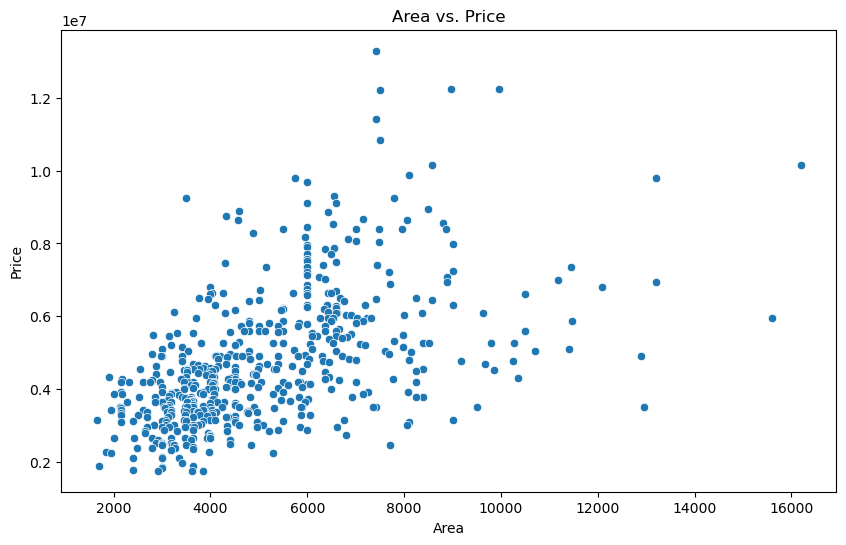

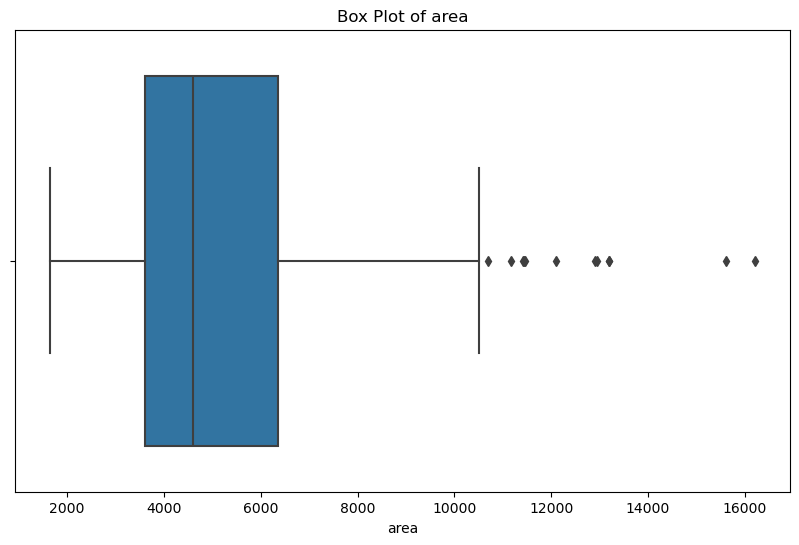

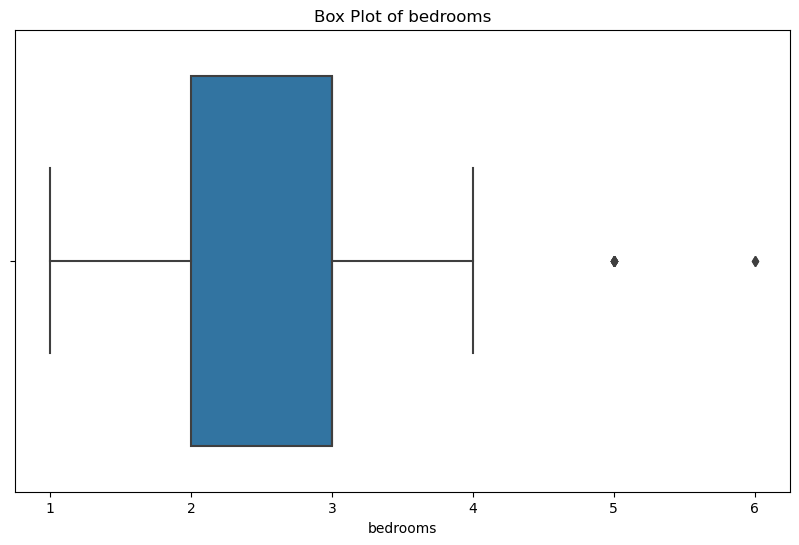

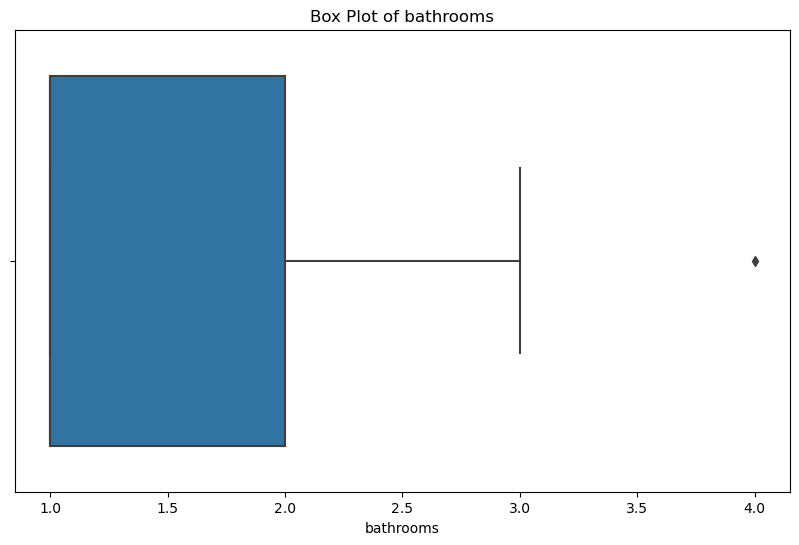

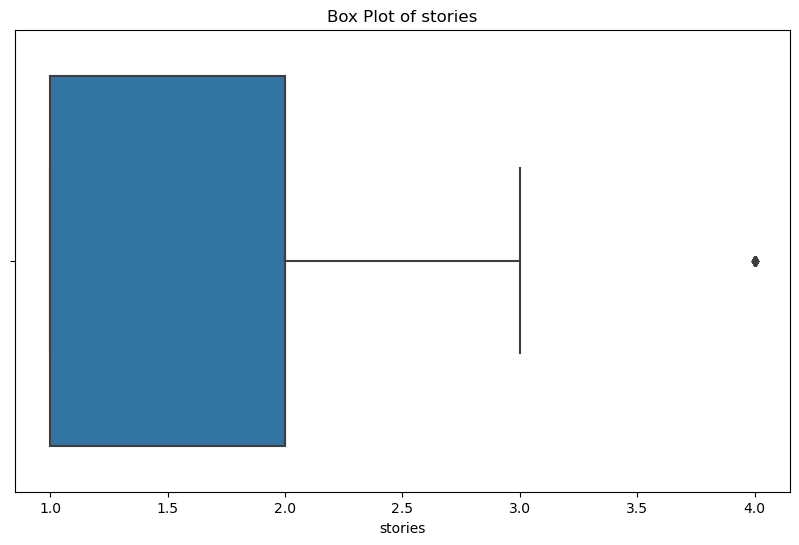

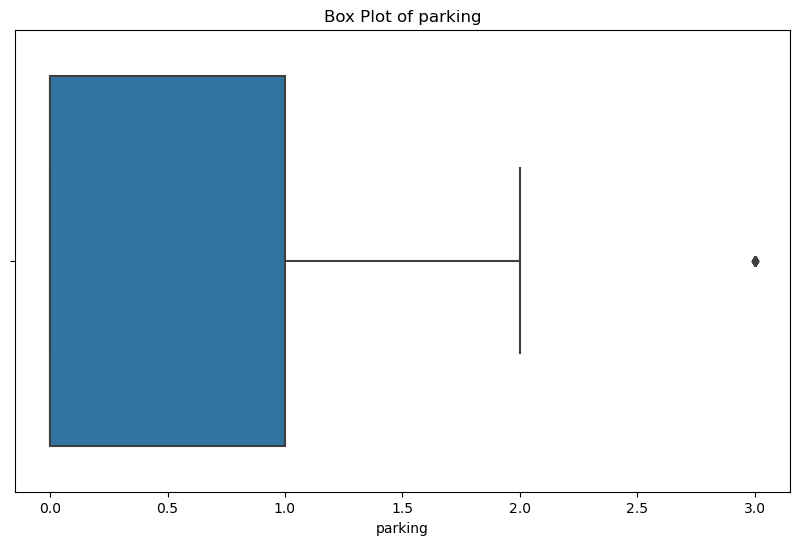

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()

# Example: Box plot for each feature
for feature in ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [24]:
z_scores = stats.zscore(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']])

threshold = 1
outliers = (abs(z_scores) > threshold).any(axis=1)

df_clean = df[~outliers]

In [25]:
X_2 = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

X_train_2_noz, X_test_2_noz, y_train_2_noz, y_test_2_noz = train_test_split(X_2, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_2_noz = scaler.fit_transform(X_train_2_noz)
X_test_2_noz = scaler.transform(X_test_2_noz)

In [27]:
X_train_2_noz = torch.tensor(X_train_2_noz, dtype=torch.float32)
y_train_2_noz = torch.tensor(y_train_2_noz.values, dtype=torch.float32).reshape(-1, 1)
X_test_2_noz = torch.tensor(X_test_2_noz, dtype=torch.float32)
y_test_2_noz = torch.tensor(y_test_2_noz.values, dtype=torch.float32).reshape(-1, 1)

In [28]:

X_2 = df_clean[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df_clean['price']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)

In [29]:
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [30]:
X_train_2 = torch.tensor(X_train_2, dtype=torch.float32)
y_train_2 = torch.tensor(y_train_2.values, dtype=torch.float32).reshape(-1, 1)
X_test_2 = torch.tensor(X_test_2, dtype=torch.float32)
y_test_2 = torch.tensor(y_test_2.values, dtype=torch.float32).reshape(-1, 1)

In [31]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

input_dim_noz = X_train_2_noz.shape[1]
model_2_noz = LinearRegressionModel(input_dim_noz)

In [32]:
input_dim = X_train_2.shape[1]
model_2 = LinearRegressionModel(input_dim)

In [33]:
def training_loop_2(n_epochs, learning_rate, model, X_train, y_train, X_val, y_val):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()

        t_p = model(X_train)
        loss = loss_fn(t_p, y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        if epoch % 500 == 0:
            model.eval()
            with torch.no_grad():
                val_loss = loss_fn(model(X_val), y_val)
            print(f'Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

    return model

In [34]:
model = training_loop_2(n_epochs=5000, learning_rate=1e-1, model=model_2_noz, X_train=X_train_2_noz, y_train=y_train_2_noz, X_val=X_test_2_noz, y_val=y_test_2_noz)

Epoch 500, Training Loss: 25234287624192.0, Validation Loss: 30129407393792.0
Epoch 1000, Training Loss: 25233784307712.0, Validation Loss: 30128818094080.0
Epoch 1500, Training Loss: 25233287282688.0, Validation Loss: 30128226697216.0
Epoch 2000, Training Loss: 25232781869056.0, Validation Loss: 30127645786112.0
Epoch 2500, Training Loss: 25232280649728.0, Validation Loss: 30127060680704.0
Epoch 3000, Training Loss: 25231779430400.0, Validation Loss: 30126473478144.0
Epoch 3500, Training Loss: 25231278211072.0, Validation Loss: 30125886275584.0
Epoch 4000, Training Loss: 25230781186048.0, Validation Loss: 30125305364480.0
Epoch 4500, Training Loss: 25230275772416.0, Validation Loss: 30124716064768.0
Epoch 5000, Training Loss: 25229776650240.0, Validation Loss: 30124135153664.0


In [35]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')

linear.weight: tensor([[93.2758, 65.0873, 93.0606, 70.1840, 66.0961]])
linear.bias: tensor([466.8694])


In [36]:
model = training_loop_2(n_epochs=5000, learning_rate=1e-1, model=model_2, X_train=X_train_2, y_train=y_train_2, X_val=X_test_2, y_val=y_test_2)

Epoch 500, Training Loss: 14690212118528.0, Validation Loss: 16475242889216.0
Epoch 1000, Training Loss: 14689833582592.0, Validation Loss: 16474839187456.0
Epoch 1500, Training Loss: 14689453998080.0, Validation Loss: 16474434437120.0
Epoch 2000, Training Loss: 14689074413568.0, Validation Loss: 16474031783936.0
Epoch 2500, Training Loss: 14688695877632.0, Validation Loss: 16473628082176.0
Epoch 3000, Training Loss: 14688316293120.0, Validation Loss: 16473226477568.0
Epoch 3500, Training Loss: 14687937757184.0, Validation Loss: 16472823824384.0
Epoch 4000, Training Loss: 14687562366976.0, Validation Loss: 16472421171200.0
Epoch 4500, Training Loss: 14687182782464.0, Validation Loss: 16472017469440.0
Epoch 5000, Training Loss: 14686806343680.0, Validation Loss: 16471615864832.0


In [37]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')

linear.weight: tensor([[ 2.3163, -0.3284, -0.3872,  3.0329, 21.6289]])
linear.bias: tensor([498.1021])


In [38]:
training_loop_2(n_epochs=5000, learning_rate=1e-2, model=model_2, X_train=X_train_2, y_train=y_train_2, X_val=X_test_2, y_val=y_test_2)

Epoch 500, Training Loss: 14686766497792.0, Validation Loss: 16471576018944.0
Epoch 1000, Training Loss: 14686728749056.0, Validation Loss: 16471535124480.0
Epoch 1500, Training Loss: 14686692048896.0, Validation Loss: 16471496327168.0
Epoch 2000, Training Loss: 14686653251584.0, Validation Loss: 16471456481280.0
Epoch 2500, Training Loss: 14686616551424.0, Validation Loss: 16471414538240.0
Epoch 3000, Training Loss: 14686578802688.0, Validation Loss: 16471375740928.0
Epoch 3500, Training Loss: 14686540005376.0, Validation Loss: 16471333797888.0
Epoch 4000, Training Loss: 14686503305216.0, Validation Loss: 16471296049152.0
Epoch 4500, Training Loss: 14686464507904.0, Validation Loss: 16471255154688.0
Epoch 5000, Training Loss: 14686427807744.0, Validation Loss: 16471213211648.0


LinearRegressionModel(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

In [39]:
training_loop_2(n_epochs=5000, learning_rate=1e-3, model=model_2, X_train=X_train_2, y_train=y_train_2, X_val=X_test_2, y_val=y_test_2)

Epoch 500, Training Loss: 14686423613440.0, Validation Loss: 16471211114496.0
Epoch 1000, Training Loss: 14686420467712.0, Validation Loss: 16471204823040.0
Epoch 1500, Training Loss: 14686417321984.0, Validation Loss: 16471202725888.0
Epoch 2000, Training Loss: 14686414176256.0, Validation Loss: 16471198531584.0
Epoch 2500, Training Loss: 14686408933376.0, Validation Loss: 16471194337280.0
Epoch 3000, Training Loss: 14686403690496.0, Validation Loss: 16471190142976.0
Epoch 3500, Training Loss: 14686402641920.0, Validation Loss: 16471185948672.0
Epoch 4000, Training Loss: 14686397399040.0, Validation Loss: 16471182802944.0
Epoch 4500, Training Loss: 14686394253312.0, Validation Loss: 16471178608640.0
Epoch 5000, Training Loss: 14686390059008.0, Validation Loss: 16471175462912.0


LinearRegressionModel(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

In [40]:
training_loop_2(n_epochs=5000, learning_rate=1e-4, model=model_2, X_train=X_train_2, y_train=y_train_2, X_val=X_test_2, y_val=y_test_2)

Epoch 500, Training Loss: 14686387961856.0, Validation Loss: 16471174414336.0
Epoch 1000, Training Loss: 14686387961856.0, Validation Loss: 16471173365760.0
Epoch 1500, Training Loss: 14686387961856.0, Validation Loss: 16471173365760.0
Epoch 2000, Training Loss: 14686386913280.0, Validation Loss: 16471173365760.0
Epoch 2500, Training Loss: 14686386913280.0, Validation Loss: 16471173365760.0
Epoch 3000, Training Loss: 14686386913280.0, Validation Loss: 16471171268608.0
Epoch 3500, Training Loss: 14686386913280.0, Validation Loss: 16471170220032.0
Epoch 4000, Training Loss: 14686386913280.0, Validation Loss: 16471170220032.0
Epoch 4500, Training Loss: 14686386913280.0, Validation Loss: 16471170220032.0
Epoch 5000, Training Loss: 14686386913280.0, Validation Loss: 16471170220032.0


LinearRegressionModel(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

In [41]:
X_3 = df_clean[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=42)

In [42]:
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

In [43]:
X_train_3 = torch.tensor(X_train_3, dtype=torch.float32)
y_train_3 = torch.tensor(y_train_3.values, dtype=torch.float32).reshape(-1, 1)
X_test_3 = torch.tensor(X_test_3, dtype=torch.float32)
y_test_3 = torch.tensor(y_test_3.values, dtype=torch.float32).reshape(-1, 1)

In [44]:
input_dim = X_train_3.shape[1]
model_3 = LinearRegressionModel(input_dim)

In [45]:
model = training_loop_2(n_epochs=5000, learning_rate=1e-1, model=model_3, X_train=X_train_3, y_train=y_train_3, X_val=X_test_3, y_val=y_test_3)

Epoch 500, Training Loss: 14690210021376.0, Validation Loss: 16475225063424.0
Epoch 1000, Training Loss: 14689830436864.0, Validation Loss: 16474801438720.0
Epoch 1500, Training Loss: 14689450852352.0, Validation Loss: 16474378862592.0
Epoch 2000, Training Loss: 14689071267840.0, Validation Loss: 16473956286464.0
Epoch 2500, Training Loss: 14688692731904.0, Validation Loss: 16473535807488.0
Epoch 3000, Training Loss: 14688313147392.0, Validation Loss: 16473115328512.0
Epoch 3500, Training Loss: 14687933562880.0, Validation Loss: 16472692752384.0
Epoch 4000, Training Loss: 14687556075520.0, Validation Loss: 16472272273408.0
Epoch 4500, Training Loss: 14687177539584.0, Validation Loss: 16471850745856.0
Epoch 5000, Training Loss: 14686799003648.0, Validation Loss: 16471430266880.0


In [46]:
model = training_loop_2(n_epochs=5000, learning_rate=1e-2, model=model_3, X_train=X_train_3, y_train=y_train_3, X_val=X_test_3, y_val=y_test_3)

Epoch 500, Training Loss: 14686760206336.0, Validation Loss: 16471387275264.0
Epoch 1000, Training Loss: 14686722457600.0, Validation Loss: 16471345332224.0
Epoch 1500, Training Loss: 14686683660288.0, Validation Loss: 16471304437760.0
Epoch 2000, Training Loss: 14686646960128.0, Validation Loss: 16471261446144.0
Epoch 2500, Training Loss: 14686609211392.0, Validation Loss: 16471219503104.0
Epoch 3000, Training Loss: 14686571462656.0, Validation Loss: 16471177560064.0
Epoch 3500, Training Loss: 14686533713920.0, Validation Loss: 16471135617024.0
Epoch 4000, Training Loss: 14686493868032.0, Validation Loss: 16471094722560.0
Epoch 4500, Training Loss: 14686458216448.0, Validation Loss: 16471049633792.0
Epoch 5000, Training Loss: 14686420467712.0, Validation Loss: 16471009787904.0


In [47]:
model = training_loop_2(n_epochs=5000, learning_rate=1e-3, model=model_3, X_train=X_train_3, y_train=y_train_3, X_val=X_test_3, y_val=y_test_3)

Epoch 500, Training Loss: 14686417321984.0, Validation Loss: 16471005593600.0
Epoch 1000, Training Loss: 14686411030528.0, Validation Loss: 16470999302144.0
Epoch 1500, Training Loss: 14686407884800.0, Validation Loss: 16470997204992.0
Epoch 2000, Training Loss: 14686403690496.0, Validation Loss: 16470990913536.0
Epoch 2500, Training Loss: 14686399496192.0, Validation Loss: 16470988816384.0
Epoch 3000, Training Loss: 14686397399040.0, Validation Loss: 16470984622080.0
Epoch 3500, Training Loss: 14686393204736.0, Validation Loss: 16470980427776.0
Epoch 4000, Training Loss: 14686387961856.0, Validation Loss: 16470976233472.0
Epoch 4500, Training Loss: 14686386913280.0, Validation Loss: 16470973087744.0
Epoch 5000, Training Loss: 14686380621824.0, Validation Loss: 16470967844864.0


In [48]:
model = training_loop_2(n_epochs=5000, learning_rate=1e-4, model=model_3, X_train=X_train_3, y_train=y_train_3, X_val=X_test_3, y_val=y_test_3)

Epoch 500, Training Loss: 14686380621824.0, Validation Loss: 16470967844864.0
Epoch 1000, Training Loss: 14686380621824.0, Validation Loss: 16470967844864.0
Epoch 1500, Training Loss: 14686380621824.0, Validation Loss: 16470965747712.0
Epoch 2000, Training Loss: 14686380621824.0, Validation Loss: 16470965747712.0
Epoch 2500, Training Loss: 14686380621824.0, Validation Loss: 16470964699136.0
Epoch 3000, Training Loss: 14686380621824.0, Validation Loss: 16470964699136.0
Epoch 3500, Training Loss: 14686378524672.0, Validation Loss: 16470964699136.0
Epoch 4000, Training Loss: 14686378524672.0, Validation Loss: 16470964699136.0
Epoch 4500, Training Loss: 14686378524672.0, Validation Loss: 16470964699136.0
Epoch 5000, Training Loss: 14686378524672.0, Validation Loss: 16470964699136.0
